# THỰC HÀNH HỌC MÁY CÓ GIÁM SÁT VỚI K-NN

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('data/iris.csv')

In [106]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- **Mô tả dữ liệu iris**: The  Iris  dataset  consists  of  150  samples  of  iris  flowers  from  three  different species: **Setosa**, **Versicolor**, and **Virginica**. Each sample includes four features: *sepal length*, *sepal 
width*,  *petal  length*,  and  *petal  width*.  It  was  introduced  by  the  British  biologist  and  statistician Ronald Fisher in 1936 as an example of discriminant analysis

## Yêu cầu: Xây dựng mô hình dự báo chủng loại Species dựa trên các đặc trưng SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

### 1. Tiến hành EDA dữ liệu: 

- a. Có bao nhiêu đặc trưng và tên đặc trưng

In [107]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

=> Có 6 đặc trưng: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

- b. Có bao nhiêu chủng loài 


In [108]:
df[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

=> Có 3 chủng loài

  - c. Tổng quan dữ liệu kiểu dữ liệu và dữ liệu thiếu 

In [109]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [110]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

=> kiểu dữ liệu lần lượt là float64 cho các thuộc tính [SepalLengthCm, SepalWidthCm, PetalLengthCm], object cho thuộc tính [Species ]

=> Dữ liệu không có dữ liệu thiếu

  - d. Thống kê các đại lượng cơ bản cho các đặc trưng 

In [111]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


  - e. Thống kê các đại lượng cơ bản cho các đặc trưng theo nhóm chủng loại 

In [112]:
df.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

  - f. Trực quan phân phối các đặc trưng và nhận xét 

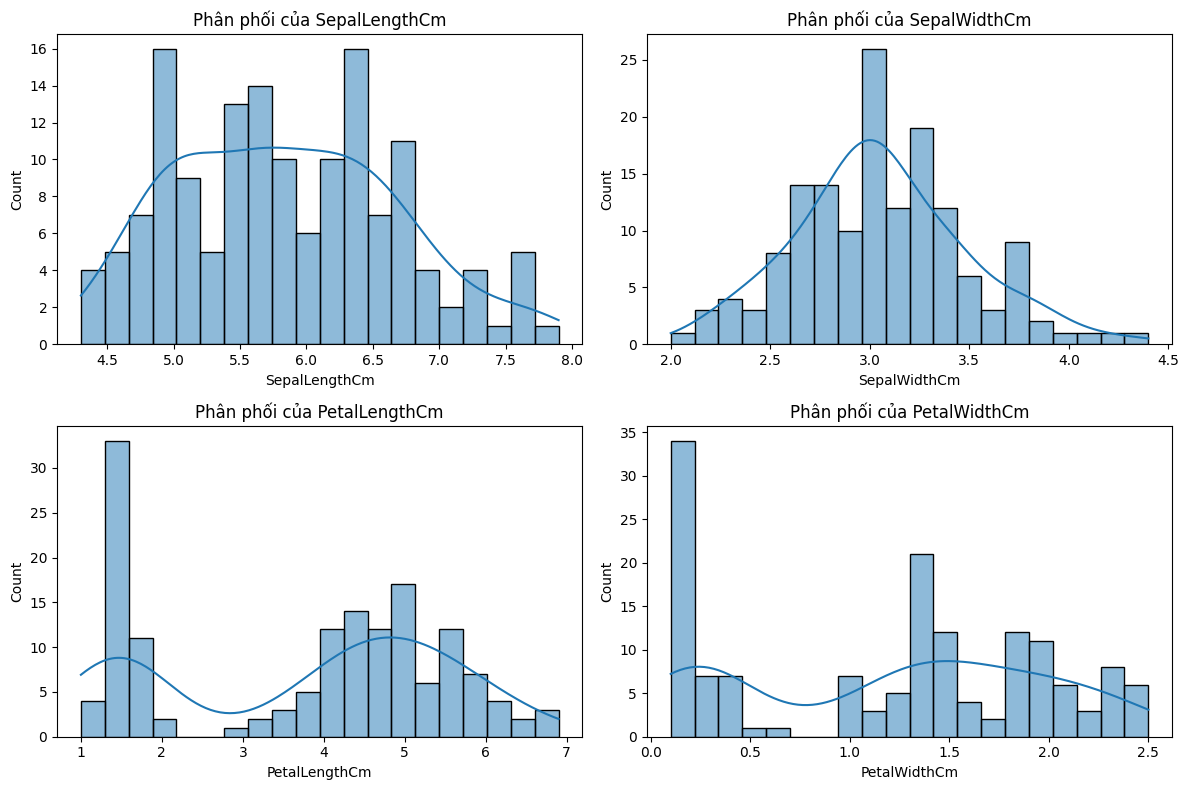

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = df.columns[1:-1]

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Phân phối của {feature}")

plt.tight_layout()
plt.show()

=> Nhận xét về phân phối của các đặc trưng:

SepalLengthCm (Chiều dài đài hoa)
  - Phân phối gần với chuẩn nhưng có xu hướng lệch nhẹ sang phải.
  - Giá trị phổ biến nhất rơi vào khoảng 5.0 - 6.5 cm.

SepalWidthCm (Chiều rộng đài hoa)
  - Phân phối lệch trái, có một số điểm dữ liệu nhỏ hơn 2.5 cm.
  - Giá trị phổ biến nhất nằm trong khoảng 2.5 - 3.5 cm.

PetalLengthCm (Chiều dài cánh hoa)
  - Phân phối hai đỉnh rõ rệt, cho thấy sự khác biệt giữa các loài Iris.
  - Có một nhóm với cánh hoa ngắn (khoảng 1 - 2 cm) và một nhóm với cánh hoa dài hơn (4 - 6 cm).

PetalWidthCm (Chiều rộng cánh hoa)
  - Cũng có hai đỉnh, phản ánh sự khác biệt giữa các loài.
  - Một nhóm có cánh hoa rất hẹp (0.1 - 0.6 cm), nhóm còn lại có cánh rộng hơn (1.2 - 2.5 cm).
  ===============================================================

  - g. Trực quan phân phối các đặc trưng theo nhóm chủng loài và nhận xét 

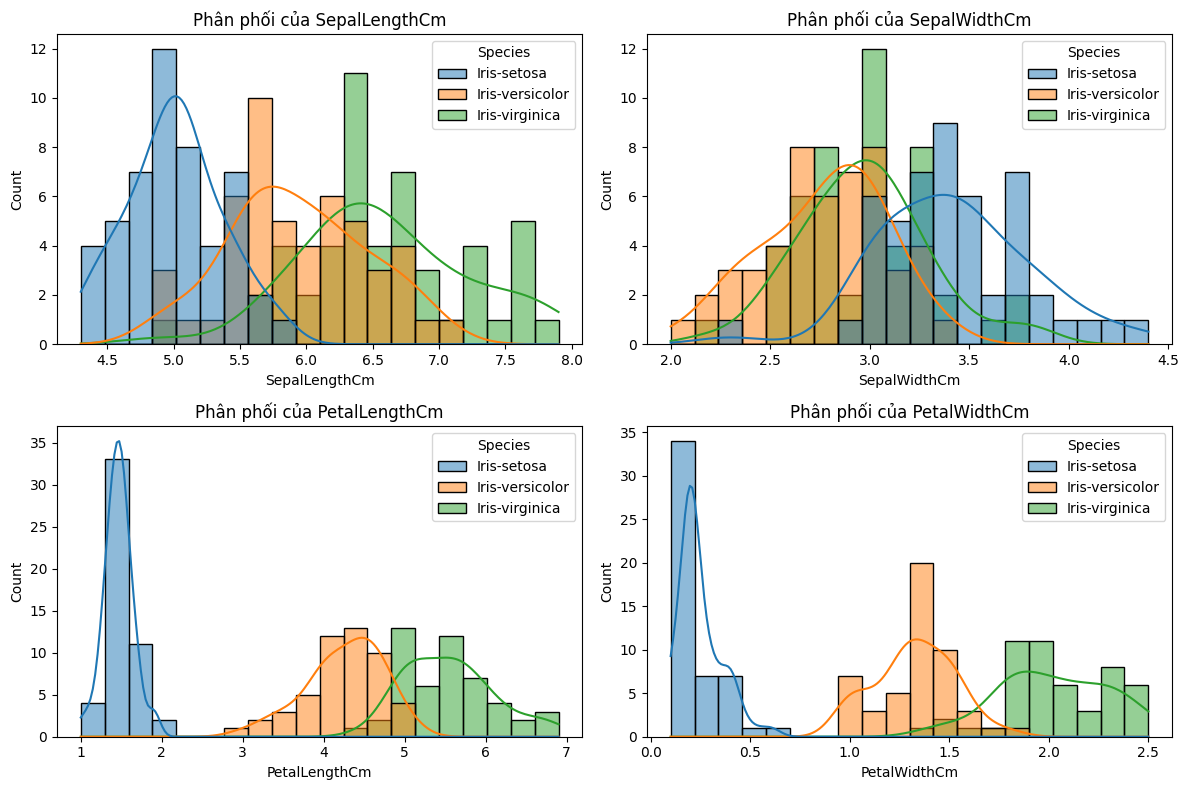

In [114]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = df.columns[1:-1]

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.histplot(df, x=feature, hue='Species', bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Phân phối của {feature}")

plt.tight_layout()
plt.show()

=> Nhận xét về phân phối các đặc trưng theo nhóm chủng loài:

SepalLengthCm (Chiều dài đài hoa)
- Phân phối của các loài Iris có sự chồng lấn đáng kể.
Iris-setosa có chiều dài đài hoa nhỏ hơn so với Iris-versicolor và Iris-virginica.
- Tuy nhiên, khó có thể phân biệt rõ ràng giữa Iris-versicolor và Iris-virginica chỉ dựa trên đặc trưng này.

SepalWidthCm (Chiều rộng đài hoa)
- Iris-setosa có phân phối rộng hơn với một số điểm dữ liệu cao hơn so với hai loài còn lại.
- Phân phối của Iris-versicolor và Iris-virginica khá chồng lấn, làm giảm khả năng phân biệt giữa hai loài.

PetalLengthCm (Chiều dài cánh hoa)
- Rất hữu ích để phân biệt giữa ba loài.
- Iris-setosa có cánh hoa ngắn hơn đáng kể so với hai loài còn lại.
- Iris-versicolor và Iris-virginica có sự khác biệt nhưng vẫn có một số chồng lấn.

PetalWidthCm (Chiều rộng cánh hoa)
- Giống như chiều dài cánh hoa, chiều rộng cánh hoa cũng giúp phân biệt tốt giữa ba loài.
- Iris-setosa có giá trị thấp nhất, không trùng với hai loài còn lại.
- Iris-versicolor và Iris-virginica có sự chồng lấn nhưng vẫn có thể phân biệt với một ngưỡng nhất định.

- h. Khám phá các giá trị bất thường của các đặc trưng theo nhóm chủng loài 

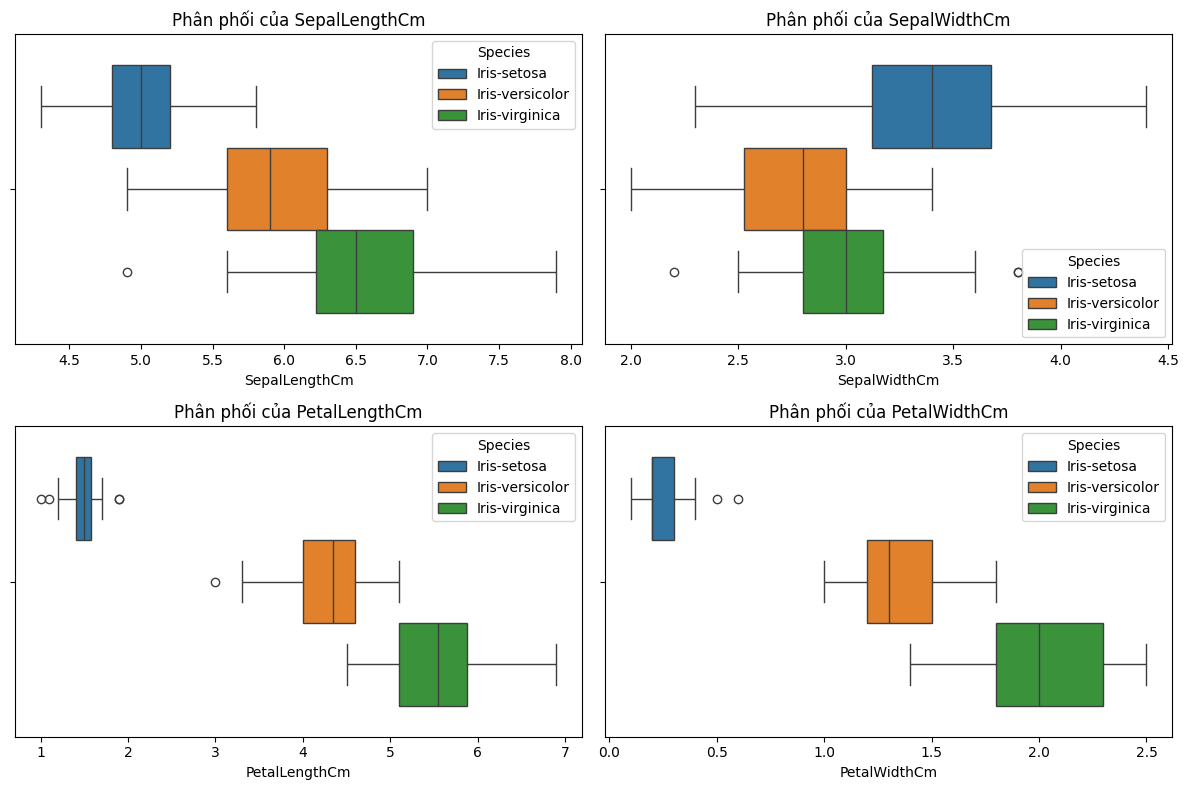

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = df.columns[1:-1]

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.boxplot(df, x=feature, hue='Species', ax=axes[row, col])
    axes[row, col].set_title(f"Phân phối của {feature}")

plt.tight_layout()
plt.show()

### 2. Tập dữ liệu sử dụng tỉ lệ train:test là 75:25 với hệ số ngẫu nhiên là 16 

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df[['Species']].values
X = X.astype(float)
y = y.flatten()

In [117]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df.index, test_size=0.25, random_state=16)

### 3. Sử dụng biểu đồ để tìm giá trị K tốt nhất cho mô hình K-NN dựa theo độ đo chính xác để đánh giá. 

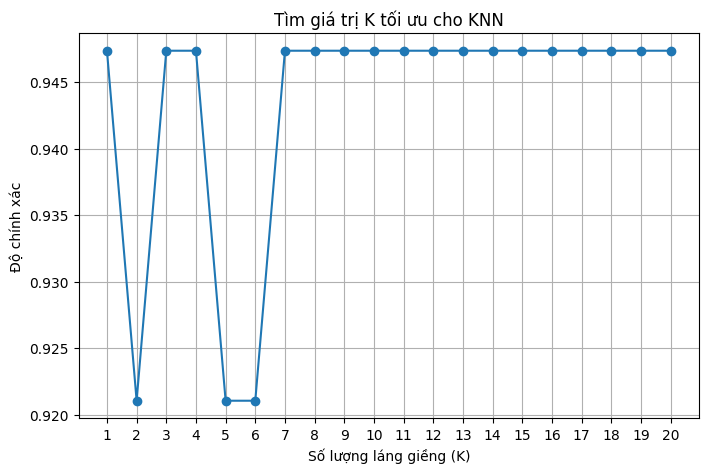

In [118]:
# Tìm giá trị K tốt nhất bằng cách thử nhiều giá trị K khác nhau
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Số lượng láng giềng (K)")
plt.ylabel("Độ chính xác")
plt.title("Tìm giá trị K tối ưu cho KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()


### 4. Sử dụng giá trị K tốt nhất để xây dựng mô hình 

In [119]:
knnModel = KNeighborsClassifier(n_neighbors=4)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### 5. Cho biết độ đo chính xác (accuracy) trên tập dữ liệu đánh giá (test data set) 

In [120]:
y_pred = knnModel.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9473684210526315


### 6. Xây dựng ma trận confusion matrix của mô hình trên tập dữ liệu test 

<Figure size 800x600 with 0 Axes>

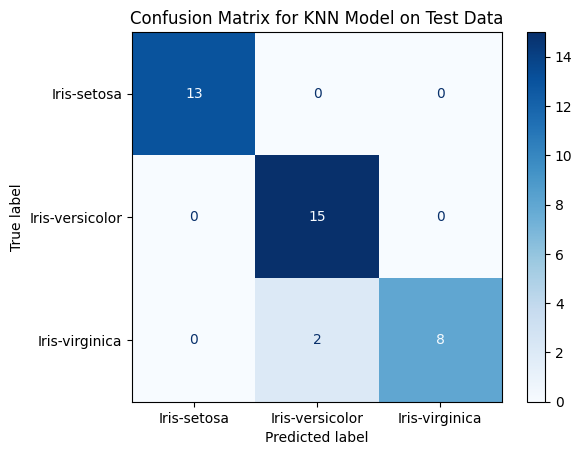

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.95        38
      macro avg       0.96      0.93      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knnModel.classes_)

class_names = knnModel.classes_

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for KNN Model on Test Data')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

### 7. Với chủng loại: Iris-setosa 

- a. Hãy cho biết các giá trị: [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision recal, F1] 

In [122]:
# Chuyển nhãn về dạng nhị phân: Iris-setosa (Positive), còn lại (Negative)
y_test_binary = (y_test == "Iris-setosa").astype(int)
y_pred_binary = (y_pred == "Iris-setosa").astype(int)

# Ma trận nhầm lẫn
tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()

# Tính các chỉ số TPR, FNR, FPR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Recall)
fnr = fn / (tp + fn)  # False Negative Rate
fpr = fp / (fp + tn)  # False Positive Rate
tnr = tn / (fp + tn)  # True Negative Rate

# Precision, Recall, F1-score
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tpr  # = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'tn: {tn}')
print(f'fp: {fp}')
print(f'fn: {fn}')
print(f'tp: {tp}')

print(f"TPR (Recall): {tpr:.4f}")
print(f"FNR: {fnr:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"TNR: {tnr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

tn: 25
fp: 0
fn: 0
tp: 13
TPR (Recall): 1.0000
FNR: 0.0000
FPR: 0.0000
TNR: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


- b. Vẽ đồ thị AUC & ROC 

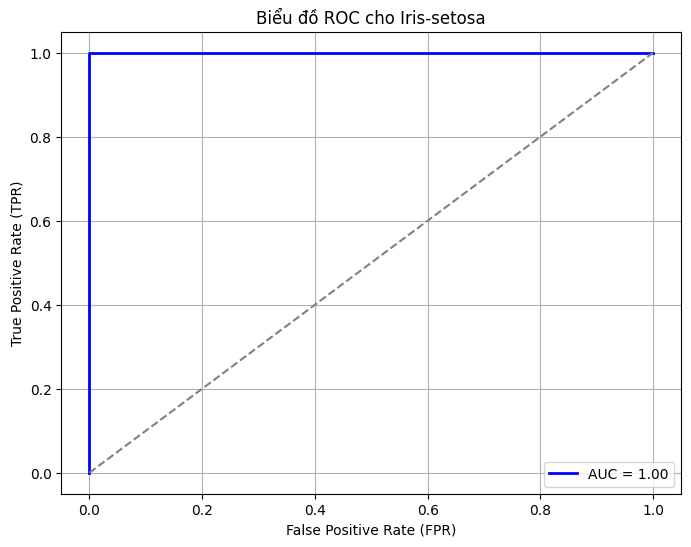

In [123]:
from sklearn.metrics import roc_curve, auc

# Vẽ đồ thị AUC & ROC
y_prob = knn.predict_proba(X_test)[:, list(knn.classes_).index("Iris-setosa")]  # Xác suất dự đoán cho Iris-setosa
fpr_values, tpr_values, _ = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr_values, tpr_values)

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, label=f"AUC = {roc_auc:.2f}", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Đường chéo
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Biểu đồ ROC cho Iris-setosa")
plt.legend()
plt.grid(True)
plt.show()

### 8. Lưu trữ mô hình với tên file iris_knn 

In [124]:
import pickle
with open('iris.pkl', 'wb') as file:
    pickle.dump(knnModel, file)

print("Model saved to iris.pkl")

Model saved to iris.pkl


### 9. Xây dựng chương trình dự báo chủng loại dựa trên các đặc trưng đầu vào. 

In [125]:
import numpy as np

with open('iris.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Make prediction
prediction = loaded_model.predict(features)

# Display results
print(f"\nPredicted class: {prediction[0]}")


Predicted class: Iris-setosa


### 10. Với các đặc trưng SepalLengthCm=4.5, SepalWidthCm=2.7, PetalLengthCm=2.0, PetalWidthCm=0.24 thì mô hình phân lớp sẽ dự báo là chủng loại nào?

=> Chủng loài: Iris-setosa